# Etude de l'Oscillation de Madden-Julian (MJO)

Auteur : FERRY Frédéric (DESR/ENM/C3M) - novembre 2020

La MJO est le principal mode de variabilité de l'atmosphère tropicale à l'échelle intra saisonnière. Elle se caractérise par le lent déplacement vers l'est d'une structure d'échelle planétaire d'anomalie de convection profonde couplée à des anomalies de vent zonal en haute et basse troposphère.

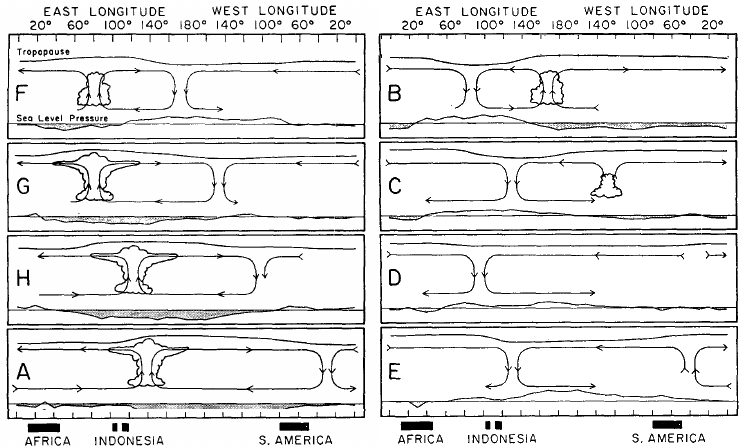

L'objectif de ce TP Python est de réaliser des composites par phases de la MJO à partir de l'indice en temps réel de la MJO (Realtime Multivariate MJO Index - Wheeler & Hendon, 2004) obtenu utilisant une méthode d'analyse en composantes principales (ACP) combinant OLR, U850 et U200 (http://www.bom.gov.au/climate/mjo/graphics/rmm.74toRealtime.txt).

Concepts Python illustrés :

- Exploitation de fichiers au format netcdf (netCDF4, xarray)
- Calcul de climatologies et d'anomalies
- Tracé de cartes et d'animations (matplotlib, cartopy)
- Réalisation de cartes "composites" par phase MJO

In [1]:
%matplotlib inline

import os
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid

import IPython.display as IPdisplay, matplotlib.font_manager as fm
from PIL import Image
import glob

In [2]:
dir_data='./data/'
dir_res='./result/'
dir_figs='./figs/'
dir_anim='./anim/'
if not os.path.exists(dir_figs):
    os.makedirs(dir_figs)
if not os.path.exists(dir_anim):
    os.makedirs(dir_anim)
if not os.path.exists(dir_res):
    os.makedirs(dir_res)

# Ouverture des données

In [6]:
rmm=np.loadtxt(dir_res+'mjo_rmm_index.txt',skiprows=247, usecols = (0,1,2,3,4,5,6))
rmm_year=rmm[:,0]
rmm_month=rmm[:,1]
rmm_day=rmm[:,2]
rmm_phase=rmm[:,6]
rmm_amplitude=rmm[:,5]
rmm_phase=rmm_phase.flatten()
rmm_amplitude=rmm_amplitude.flatten()
print(rmm_year[0])
print(rmm_month[0])
print(rmm_day[0])
print(rmm_year[-1])
print(rmm_month[-1])
print(rmm_day[-1])
print(rmm_phase)

1981.0
1.0
1.0
2020.0
12.0
31.0
[0. 0. 0. ... 0. 0. 0.]


In [7]:
year1='1981'
year2='2020'
fo    = xr.open_dataset(dir_data+'olr.day.mean.nc').sel(time=slice(year1,year2))
fu    = xr.open_dataset(dir_data+'uwnd850.1980-2021.nc').sel(time=slice(year1,year2))
fv    = xr.open_dataset(dir_data+'vwnd850.1980-2021.nc').sel(time=slice(year1,year2))
lat = fo.lat.values
lon = fo.lon.values
print(' ----- Computing daily anomalies ----- ')
fo_anom=fo.groupby('time.dayofyear') - fo.groupby('time.dayofyear').mean('time')
fu_anom=fu.groupby('time.dayofyear') - fu.groupby('time.dayofyear').mean('time')
fv_anom=fv.groupby('time.dayofyear') - fv.groupby('time.dayofyear').mean('time')
time  = fo.time.values
lat = fo.lat.values
olr = fo['olr']
olr_anom = fo_anom['olr']
u = fu['uwnd']
u_anom = fu_anom['uwnd']
v = fv['vwnd']
v_anom = fv_anom['vwnd']
print(' ----- Done ----- ')

 ----- Computing daily anomalies ----- 
 ----- Done ----- 


# Calcul des composites par phase MJO

In [8]:
#months=[1,2,3,11,12]
#months_txt="NDJFM"
months=[5,6,7,8,9]
months_txt="MJJAS"

years=[5,6,7,8,9]

In [9]:
# Construct logical array for season
season = np.any([rmm_month == months[0], rmm_month == months[1], rmm_month == months[2], rmm_month == months[3], rmm_month == months[4]], axis=0)

# Construct logical array for phases
phase0 = np.all([rmm_phase==0], axis=0)
phase1 = np.all([rmm_phase==1], axis=0)
phase2 = np.all([rmm_phase==2], axis=0)
phase3 = np.all([rmm_phase==3], axis=0)
phase4 = np.all([rmm_phase==4], axis=0)
phase5 = np.all([rmm_phase==5], axis=0)
phase6 = np.all([rmm_phase==6], axis=0)
phase7 = np.all([rmm_phase==7], axis=0)
phase8 = np.all([rmm_phase==8], axis=0)

#Intersection of conditions for season
p0=np.logical_and(season, phase0)[:]
p1=np.logical_and(season, phase1)[:]
p2=np.logical_and(season, phase2)[:]
p3=np.logical_and(season, phase3)[:]
p4=np.logical_and(season, phase4)[:]
p5=np.logical_and(season, phase5)[:]
p6=np.logical_and(season, phase6)[:]
p7=np.logical_and(season, phase7)[:]
p8=np.logical_and(season, phase8)[:]

# Select data for season and filtered by phase
olr_p0=olr_anom[p0,:,:]
olr_p1=olr_anom[p1,:,:]
olr_p2=olr_anom[p2,:,:]
olr_p3=olr_anom[p3,:,:]
olr_p4=olr_anom[p4,:,:]
olr_p5=olr_anom[p5,:,:]
olr_p6=olr_anom[p6,:,:]
olr_p7=olr_anom[p7,:,:]
olr_p8=olr_anom[p8,:,:]

u_p0=u_anom[p0,:,:]
u_p1=u_anom[p1,:,:]
u_p2=u_anom[p2,:,:]
u_p3=u_anom[p3,:,:]
u_p4=u_anom[p4,:,:]
u_p5=u_anom[p5,:,:]
u_p6=u_anom[p6,:,:]
u_p7=u_anom[p7,:,:]
u_p8=u_anom[p8,:,:]

v_p0=v_anom[p0,:,:]
v_p1=v_anom[p1,:,:]
v_p2=v_anom[p2,:,:]
v_p3=v_anom[p3,:,:]
v_p4=v_anom[p4,:,:]
v_p5=v_anom[p5,:,:]
v_p6=v_anom[p6,:,:]
v_p7=v_anom[p7,:,:]
v_p8=v_anom[p8,:,:]

# Number of days per phase

n0=len(olr_p0[:,0,0])
n1=len(olr_p1[:,0,0])
n2=len(olr_p2[:,0,0])
n3=len(olr_p3[:,0,0])
n4=len(olr_p4[:,0,0])
n5=len(olr_p5[:,0,0])
n6=len(olr_p6[:,0,0])
n7=len(olr_p7[:,0,0])
n8=len(olr_p8[:,0,0])

n=np.stack((n0, n1, n2, n3, n4, n5, n6, n7, n8))
print(n)

# Compute season composites for the 8 phases 

olr_composite0=olr_p0.mean(axis=0)
olr_composite1=olr_p1.mean(axis=0)
olr_composite2=olr_p2.mean(axis=0)
olr_composite3=olr_p3.mean(axis=0)
olr_composite4=olr_p4.mean(axis=0)
olr_composite5=olr_p5.mean(axis=0)
olr_composite6=olr_p6.mean(axis=0)
olr_composite7=olr_p7.mean(axis=0)
olr_composite8=olr_p8.mean(axis=0)

olr_composite = np.ones((9,len(lat),len(lon)))
olr_composite[0,:,:]=olr_composite0
olr_composite[1,:,:]=olr_composite1
olr_composite[2,:,:]=olr_composite2
olr_composite[3,:,:]=olr_composite3
olr_composite[4,:,:]=olr_composite4
olr_composite[5,:,:]=olr_composite5
olr_composite[6,:,:]=olr_composite6
olr_composite[7,:,:]=olr_composite7
olr_composite[8,:,:]=olr_composite8

u_composite0=u_p0.mean(axis=0).values
u_composite1=u_p1.mean(axis=0).values
u_composite2=u_p2.mean(axis=0).values
u_composite3=u_p3.mean(axis=0).values
u_composite4=u_p4.mean(axis=0).values
u_composite5=u_p5.mean(axis=0).values
u_composite6=u_p6.mean(axis=0).values
u_composite7=u_p7.mean(axis=0).values
u_composite8=u_p8.mean(axis=0).values

u_composite = np.ones((9,len(lat),len(lon)))
u_composite[0,:,:]=u_composite0
u_composite[1,:,:]=u_composite1
u_composite[2,:,:]=u_composite2
u_composite[3,:,:]=u_composite3
u_composite[4,:,:]=u_composite4
u_composite[5,:,:]=u_composite5
u_composite[6,:,:]=u_composite6
u_composite[7,:,:]=u_composite7
u_composite[8,:,:]=u_composite8

v_composite0=v_p0.mean(axis=0).values
v_composite1=v_p1.mean(axis=0).values
v_composite2=v_p2.mean(axis=0).values
v_composite3=v_p3.mean(axis=0).values
v_composite4=v_p4.mean(axis=0).values
v_composite5=v_p5.mean(axis=0).values
v_composite6=v_p6.mean(axis=0).values
v_composite7=v_p7.mean(axis=0).values
v_composite8=v_p8.mean(axis=0).values

v_composite = np.ones((9,len(lat),len(lon)))
v_composite[0,:,:]=v_composite0
v_composite[1,:,:]=v_composite1
v_composite[2,:,:]=v_composite2
v_composite[3,:,:]=v_composite3
v_composite[4,:,:]=v_composite4
v_composite[5,:,:]=v_composite5
v_composite[6,:,:]=v_composite6
v_composite[7,:,:]=v_composite7
v_composite[8,:,:]=v_composite8

[2605  544  411  323  456  526  489  337  429]


# Tracés

C:\ProgramData\Anaconda\lib\site-packages\cartopy\vector_transform.py:140: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


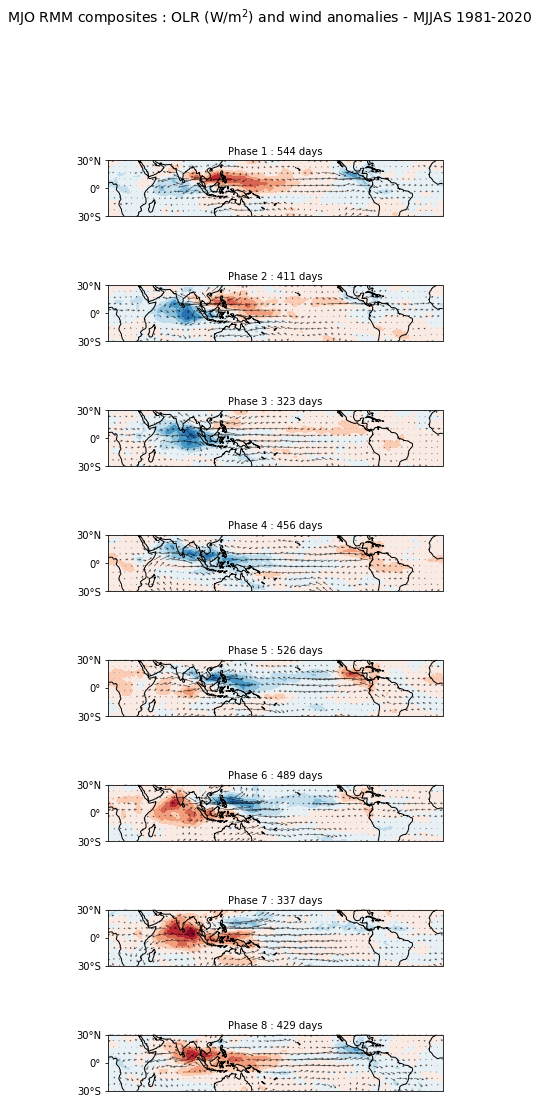

In [10]:
levels = np.arange(-30,35,5)
cmap='RdBu_r'
lonW=lon[0]
lonE=lon[-1]
latS=-30.
latN=30.
bounds = [(lonW, lonE, latS, latN)]
plt_title='MJO RMM composites : OLR (W/m$^2$) and wind anomalies - '+months_txt+' '+year1+'-'+year2

def plot_background(ax):
   ax.set_yticks(np.linspace(latS, latN, 3), crs=ccrs.PlateCarree())
   lat_formatter = LatitudeFormatter()
   ax.yaxis.set_major_formatter(lat_formatter)
   ax.coastlines()
   ax.set_extent(*bounds, crs=ccrs.PlateCarree())
   return ax

fig = plt.figure(figsize=(6, 18))
fig.suptitle(plt_title, fontsize=14)


for i in range(1,9):
    ax = fig.add_subplot(8, 1, i, projection=ccrs.PlateCarree(central_longitude=180.0))
    plot_background(ax)
    ax.set_title('Phase '+str(i)+' : '+str(n[i])+' days', fontsize=10)
    cf = ax.contourf(lon, lat, olr_composite[i], levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
    w = ax.quiver(lon, lat, u_composite[i], v_composite[i], pivot='tail', minshaft=1.,
                  minlength=1.0, headlength=5, headaxislength=3, headwidth=5,
                  scale=80, alpha=0.8, width=0.0015, linestyle='solid', angles='xy', regrid_shape=10,
                  transform=ccrs.PlateCarree())

#cb = fig.colorbar(cf, orientation='horizontal', extend='max', aspect=65, shrink=1, pad=0.20, extendrect='True')
ax.quiverkey(w, 0.88, 0.02, 2, r'$2 \frac{m}{s}$', labelpos='E', coordinates='figure')

fig.tight_layout()

plt.show()

figname=dir_figs+'MJO_RMM_OLR_WINDS_'+months_txt
fig.savefig(figname+'.png', bbox_inches = 'tight')

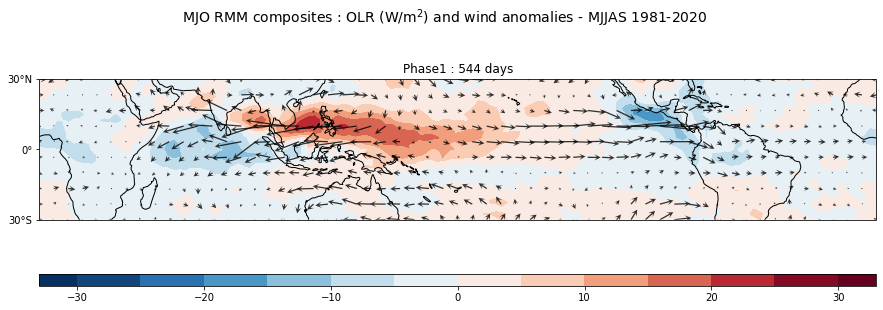

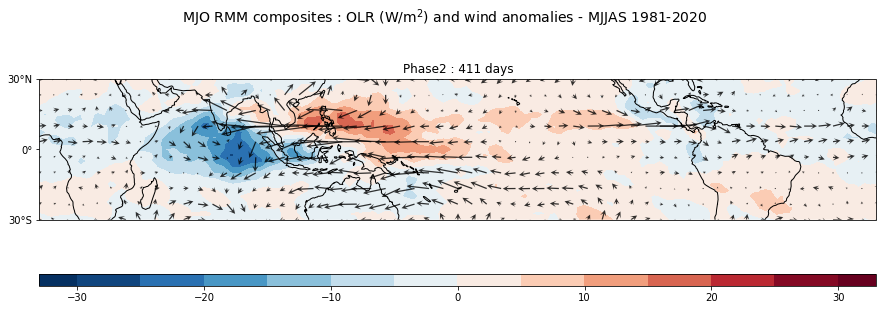

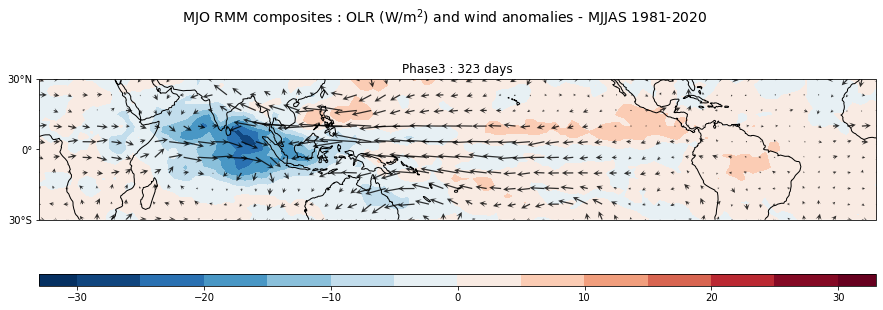

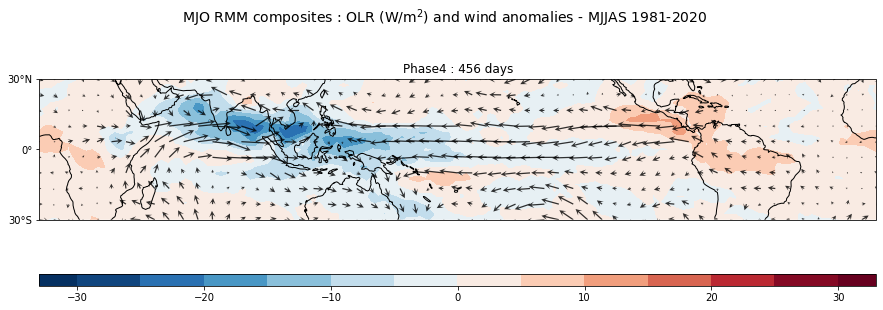

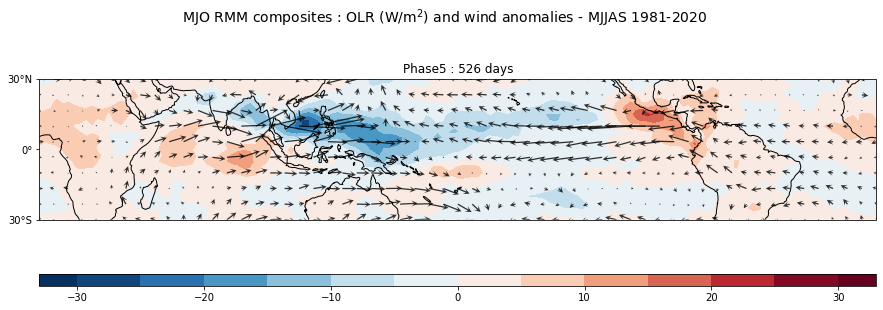

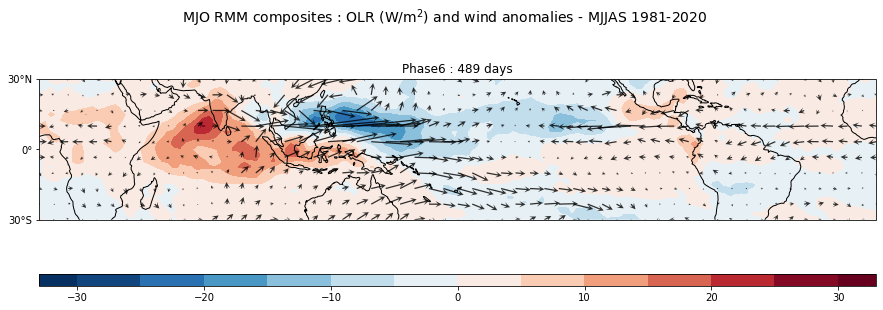

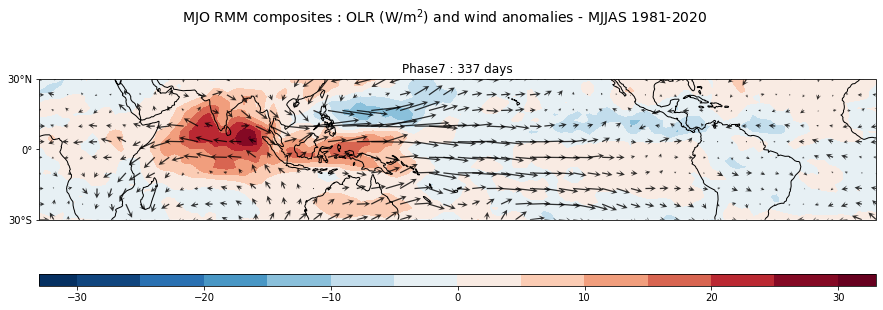

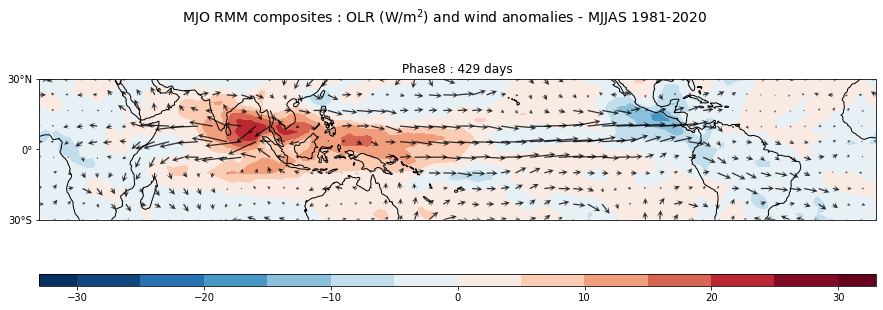

In [11]:
for i in range(1,9):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(plt_title, fontsize=14)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180.0))
    plot_background(ax)
    ax.set_title('Phase'+str(i)+' : '+str(n[i])+' days', fontsize=12)
    cf = ax.contourf(lon, lat, olr_composite[i], levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
    w = ax.quiver(lon, lat, u_composite[i], v_composite[i], pivot='tail', minshaft=1.,
                  minlength=1.0, headlength=5, headaxislength=3, headwidth=5,
                  scale=80, alpha=0.8, width=0.0015, linestyle='solid', angles='xy', regrid_shape=10,
                  transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', extend='max', aspect=65, shrink=1, pad=0.20, extendrect='True')
    plt.show()
    figname=dir_anim+'MJO_RMM_OLR_WINDS_'+months_txt+'_'+str(i)
    fig.savefig(figname+'.png', bbox_inches = 'tight')

In [12]:
def make_animation():
    nbimages=8
    # create a tuple of display durations, one for each frame
    first_last = 1000 #show the first and last frames for 100 ms
    standard_duration = 1000 #show all other frames for 5 ms
    durations = tuple([first_last] + [standard_duration] * (nbimages - 2) + [first_last])
    # load all the static images into a list
    images = [Image.open(image) for image in sorted(glob.glob('{}/*.png'.format(dir_anim)))]
    # save as an animated gif
    gif = images[0]
    gif.info['duration'] = durations #ms per frame
    gif.info['loop'] = 0 #how many times to loop (0=infinite)
    gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
    # verify that the number of frames in the gif equals the number of image files and durations
    Image.open(gif_filepath).n_frames == len(images) == len(durations)
    # clean png
    os.chdir(dir_anim)
    for f in glob.glob("*.png"):
        os.remove(f)
    os.chdir("../")
    return Image

In [13]:
gif_filepath = dir_anim+'MJO_RMM_OLR_WINDS_'+months_txt+'.gif'
make_animation()
IPdisplay.Image(url=gif_filepath)

# Pour aller plus loin

- Réaliser des composites par phase de la MJO pour les variables potentiel de vitesse à 200 hPa, Pression réduite au niveau de la mer, précipitations, fonction de courant à 200 hPa (données à demander à l'encadrant).

- Réaliser des composites par phase de la MJO des cyclogenèses/trajectoires de cyclones tropicaux (données à demander à l'encadrant).